In [2]:
from sklearn.feature_selection import VarianceThreshold
# 每个特征都是两点分布
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
#剔除某一个值概率超过0.8的特征，方差最小为0.8*0.2=0.16
sel = VarianceThreshold(threshold=0.16)
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
# 导入SelectKBest方法和检测指标f_classif（F检验）
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  #f_classif（F检验）

(150, 4)


In [4]:
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
print(X_new.shape)

(150, 2)


In [9]:
#进行重要性排名
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# 加载数据集
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)

# 创建RFE对象并进行排名
svc = SVC(kernel = 'linear',C =1)
rfe = RFE(estimator=svc,n_features_to_select =1,step=1)# 回归特征消除，让回归特征消除过程中只保留一定数量的特征，避免过度拟合
rfe.fit(X,y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

(1797, 64)


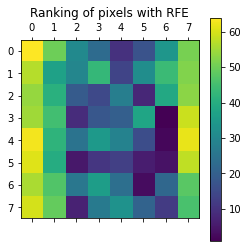

In [10]:
# 根据排名ranking进行作图
plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [11]:
# 自递归式特征消除法动调整特征数
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# 使用三个特征进行交叉验证
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# 创建RFE对象，计算交叉验证分数（准确度得分）
svc = SVC(kernel="linear")

# 使用rfecv函数，迭代到最佳特征数
min_features_to_select = 1 
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 3


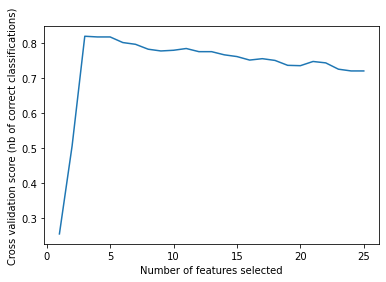

In [12]:
# 作图：每个特征的交叉验证分数
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [13]:
# 正则化方法：将数据稀疏化，在数据更加分散的过程中，许多系数逐渐归0。

# 导入鸢尾花数据集
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

# 使用LinearSVC方法
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(150, 4)
(150, 3)


In [14]:
# 导入鸢尾花数据集
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

In [15]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.10215162, 0.05693526, 0.3558903 , 0.48502282])

In [16]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape         

(150, 2)

In [21]:
# 导入乳腺癌数据集
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape)

(569, 30)


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # f检验
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print(X_new.shape)

(569, 20)


In [25]:
len(X_new)

569